In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('D:\\Documents\机器学习课设数据\\Predict Future Sales\\test.csv', 
                   dtype={'ID': 'int32', 'shop_id': 'int32', 'item_id': 'int32'})
item_categories = pd.read_csv('D:\Documents\机器学习课设数据\Predict Future Sales\item_categories.csv', 
                   dtype={'item_category_name': 'str', 'item_category_id': 'int32'})
items = pd.read_csv('D:\Documents\机器学习课设数据\Predict Future Sales\items.csv', 
                    dtype={'item_name': 'str','item_id': 'int32', 'item_category_id': 'int32'})
shops = pd.read_csv('D:\Documents\机器学习课设数据\Predict Future Sales\shops.csv', 
                    dtype={'shop_name': 'str', 'shop_id': 'int32'})
sales = pd.read_csv('D:\Documents\机器学习课设数据\Predict Future Sales\sales_train.csv', parse_dates=['date'], dtype={'date': 'str', 'date_block_num': 'int32',
                    'shop_id': 'int32', 'item_id': 'int32', 'item_price': 'float32', 'item_cnt_day': 'int32'})

In [3]:
train = sales.join(items, on='item_id', rsuffix='_').join(shops, on='shop_id', rsuffix='_').join(item_categories, on='item_category_id', rsuffix='_').drop(['item_id_', 'shop_id_', 'item_category_id_'], axis=1)

In [4]:
train.head().append(train.tail())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,2013-02-01,0,59,22154,999.000000,1,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,2013-03-01,0,25,2552,899.000000,1,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
2,2013-05-01,0,25,2552,899.000000,-1,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,2013-06-01,0,25,2554,1709.050049,1,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,2013-01-15,0,25,2555,1099.000000,1,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства
2935844,2015-10-10,33,25,7409,299.000000,1,V/A Nu Jazz Selection (digipack),55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
2935845,2015-09-10,33,25,7460,299.000000,1,V/A The Golden Jazz Collection 1 2CD,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
2935846,2015-10-14,33,25,7459,349.000000,1,V/A The Best Of The 3 Tenors,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
2935847,2015-10-22,33,25,7440,299.000000,1,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,"Москва ТРК ""Атриум""",Музыка - MP3
2935848,2015-03-10,33,25,7460,299.000000,1,V/A The Golden Jazz Collection 1 2CD,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства


In [5]:
train.shape

(2935849, 10)

In [6]:
test.head().append(test.tail())

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648
214199,214199,45,969


In [7]:
 # 数据泄漏
test_shop_ids = test['shop_id'].unique()
test_item_ids = test['item_id'].unique()

lk_train = train[train['shop_id'].isin(test_shop_ids)]

lk_train = lk_train[lk_train['item_id'].isin(test_item_ids)]

train_monthly = lk_train[['date', 'date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'item_cnt_day']]
train_monthly.head().append(train_monthly.tail())
train_monthly

,date,date_block_num,shop_id,item_category_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,37,22154,999.0,1
10,2013-03-01,0,25,55,2574,399.0,2
11,2013-05-01,0,25,55,2574,399.0,1
12,2013-07-01,0,25,55,2574,399.0,1
13,2013-08-01,0,25,55,2574,399.0,2
...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,55,7409,299.0,1
2935845,2015-09-10,33,25,55,7460,299.0,1
2935846,2015-10-14,33,25,55,7459,349.0,1
2935847,2015-10-22,33,25,57,7440,299.0,1


In [8]:
## 缺失值
print(train_monthly.isnull().sum())

date                0
date_block_num      0
shop_id             0
item_category_id    0
item_id             0
item_price          0
item_cnt_day        0
dtype: int64


In [9]:
train_monthly = train_monthly.sort_values('date').groupby(['date_block_num', 'shop_id', 'item_category_id', 'item_id'], as_index=False)

train_monthly = train_monthly.agg({'item_price':['sum', 'mean'], 'item_cnt_day':['sum', 'mean','count']})
# Rename features.
train_monthly.columns = ['date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'mean_item_price', 'item_cnt', 'mean_item_cnt', 'transactions']
train_monthly.head().append(train_monthly.tail())

,date_block_num,shop_id,item_category_id,item_id,item_price,mean_item_price,item_cnt,mean_item_cnt,transactions
0,0,2,2,5572,10730.000000,1532.857178,9,1.285714,7
1,0,2,2,5643,4775.209961,2387.604980,0,0.000000,2
2,0,2,5,5583,1188.300049,594.150024,2,1.000000,2
3,0,2,6,7893,5970.000000,1990.000000,3,1.000000,3
4,0,2,6,7894,1490.000000,1490.000000,1,1.000000,1
600154,33,59,75,5383,4390.000000,4390.000000,1,1.000000,1
600155,33,59,79,17717,8025.500000,802.549988,13,1.300000,10
600156,33,59,83,22087,357.000000,119.000000,6,2.000000,3
600157,33,59,83,22088,238.000000,119.000000,2,1.000000,2
600158,33,59,83,22091,179.000000,179.000000,1,1.000000,1


In [10]:
shop_ids = train_monthly['shop_id'].unique()
item_ids = train_monthly['item_id'].unique()
empty_df = []
for i in range(34):
    for shop in shop_ids:
        for item in item_ids:
            empty_df.append([i, shop, item])

empty_df = pd.DataFrame(empty_df, columns=['date_block_num','shop_id','item_id'])

train_monthly = pd.merge(empty_df, train_monthly, on=['date_block_num','shop_id','item_id'], how='left')

train_monthly.fillna(0, inplace=True)

train_monthly['year'] = train_monthly['date_block_num'].apply(lambda x: ((x//12) + 2013))
train_monthly['month'] = train_monthly['date_block_num'].apply(lambda x: (x % 12))

In [11]:
gp_month_mean = train_monthly.groupby(['month'], as_index=False)['item_cnt'].mean()
gp_month_sum = train_monthly.groupby(['month'], as_index=False)['item_cnt'].sum()
gp_category_mean = train_monthly.groupby(['item_category_id'], as_index=False)['item_cnt'].mean()
gp_category_sum = train_monthly.groupby(['item_category_id'], as_index=False)['item_cnt'].sum()
gp_shop_mean = train_monthly.groupby(['shop_id'], as_index=False)['item_cnt'].mean()
gp_shop_sum = train_monthly.groupby(['shop_id'], as_index=False)['item_cnt'].sum()


In [12]:
sales[['date_block_num','shop_id']] = sales[['date_block_num','shop_id']].astype('int8')
sales[['item_cnt_day','item_id']] = sales[['item_cnt_day','item_id']].astype('int16')
sales['item_price'] = sales['item_price'].astype('float32')

In [13]:
shop_test = test['shop_id'].nunique()
item_test = test['item_id'].nunique()
total_product_test = test[['shop_id','item_id']].drop_duplicates()
shop_train = sales['shop_id'].nunique()
item_train = sales['item_id'].nunique()
total_product_train = sales[['shop_id','item_id']].drop_duplicates()

print('We need to predict products from {} shops and {} kinds of products (total shop-item {} pairs)'.format(shop_test,item_test,total_product_test.shape[0]))
print('given that historical daily sale number from {} shops and {} kinds of products (total shop-item {} pairs)'.format(shop_train,item_train,total_product_train.shape[0]))

We need to predict products from 42 shops and 5100 kinds of products (total shop-item 214200 pairs)
given that historical daily sale number from 60 shops and 21807 kinds of products (total shop-item 424124 pairs)


In [14]:
#100,000 pairs have no sale recored
common_pairs = total_product_test.merge(total_product_train,how='inner',on=['shop_id','item_id']).shape[0]
test_only_pairs = total_product_test.shape[0] - common_pairs
print(f'{common_pairs} pairs of products are shared by historical and to be predicted.')
print(f'{test_only_pairs} pairs are new pairs, so there is no corresponding historical data for prediciton.')

111404 pairs of products are shared by historical and to be predicted.
102796 pairs are new pairs, so there is no corresponding historical data for prediciton.


In [15]:
#363 items are new items that never seen before
total_items_test = total_product_test['item_id'].drop_duplicates()
total_items_train = total_product_train['item_id'].drop_duplicates()
total_items_join = pd.merge(total_items_test,total_items_train,how='outer',on=['item_id'],indicator=True)
total_items_join = total_items_join.replace({'both':'hisory and target','left_only':'target only','right_only':'hisory only'})
total_items_join['_merge'].value_counts()

hisory only          17070
hisory and target     4737
target only            363
Name: _merge, dtype: int64

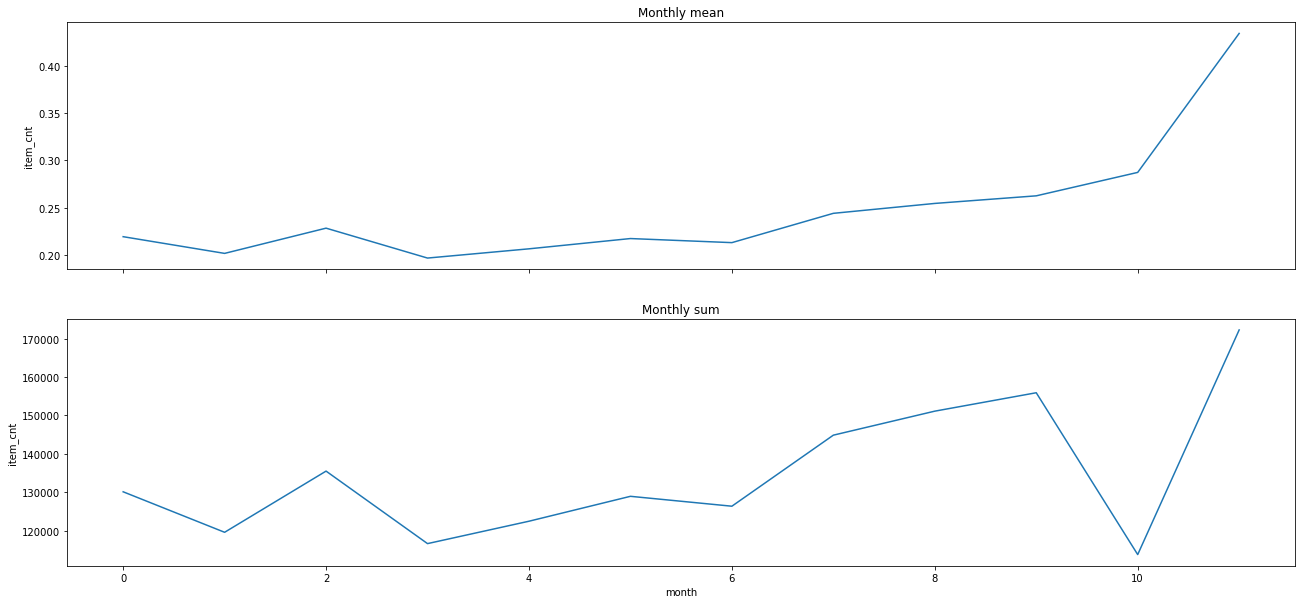

In [16]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
sns.lineplot(x="month", y="item_cnt", data=gp_month_mean, ax=axes[0]).set_title("Monthly mean")
sns.lineplot(x="month", y="item_cnt", data=gp_month_sum, ax=axes[1]).set_title("Monthly sum")
plt.show()

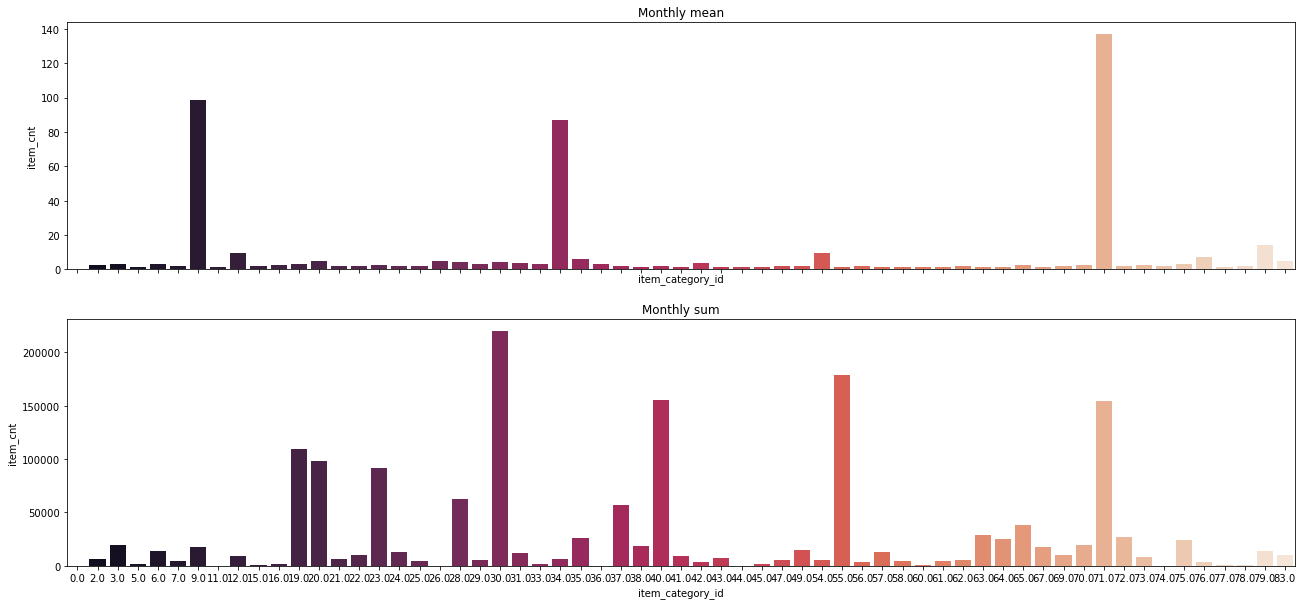

In [17]:
f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
sns.barplot(x="item_category_id", y="item_cnt", data=gp_category_mean, ax=axes[0], palette="rocket").set_title("Monthly mean")
sns.barplot(x="item_category_id", y="item_cnt", data=gp_category_sum, ax=axes[1], palette="rocket").set_title("Monthly sum")
plt.show()

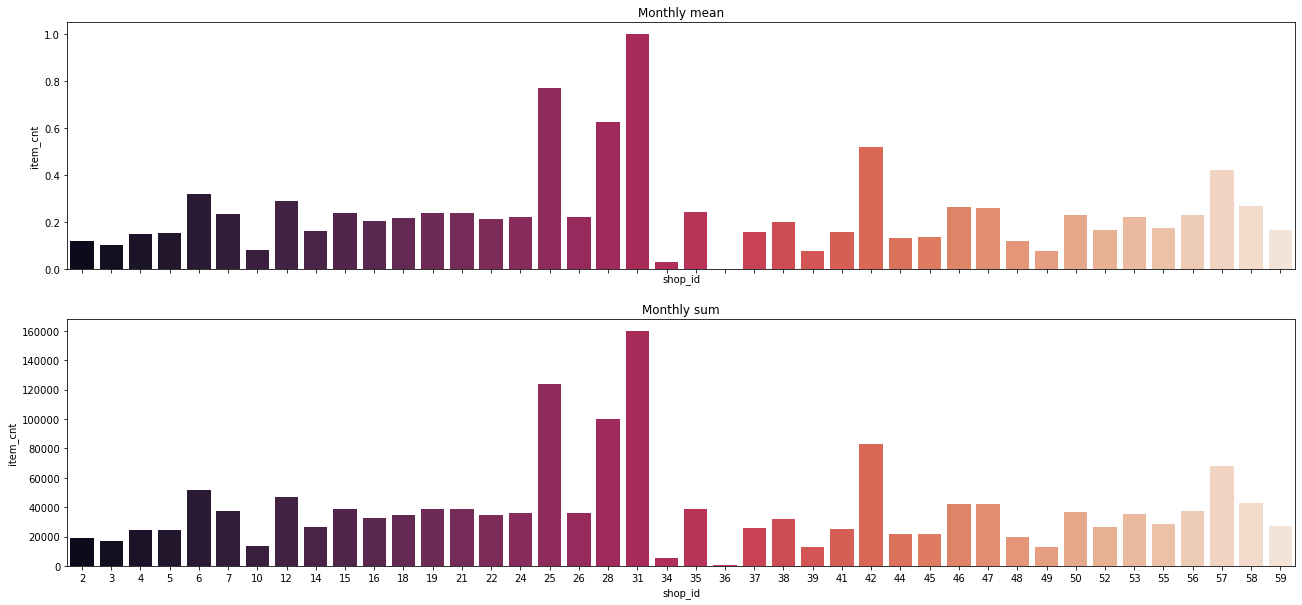

In [18]:
f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
sns.barplot(x="shop_id", y="item_cnt", data=gp_shop_mean, ax=axes[0], palette="rocket").set_title("Monthly mean")
sns.barplot(x="shop_id", y="item_cnt", data=gp_shop_sum, ax=axes[1], palette="rocket").set_title("Monthly sum")
plt.show()

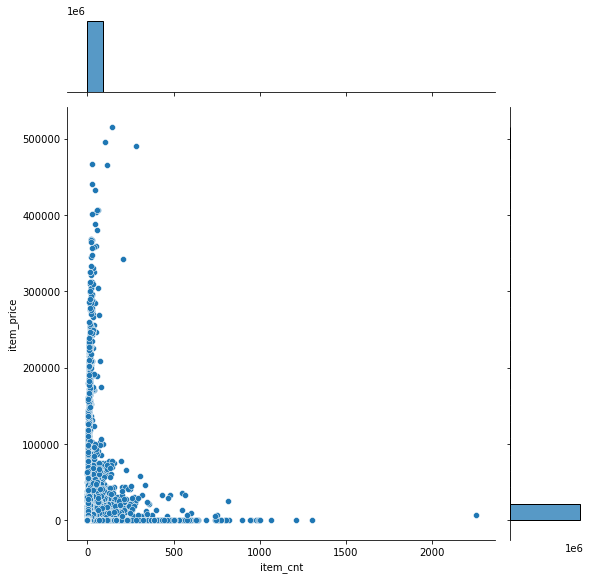

In [19]:
sns.jointplot(x="item_cnt",y="item_price", data=train_monthly, height=8)
plt.show()

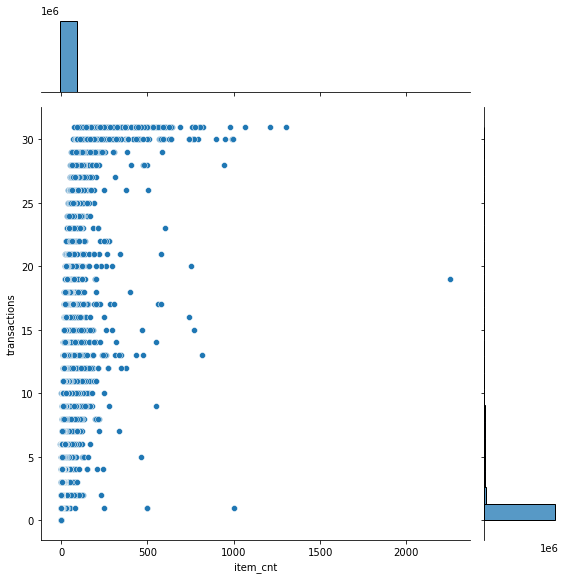

In [20]:
sns.jointplot(x="item_cnt",y="transactions", data=train_monthly, height=8)
plt.show()

E:\acaconda\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


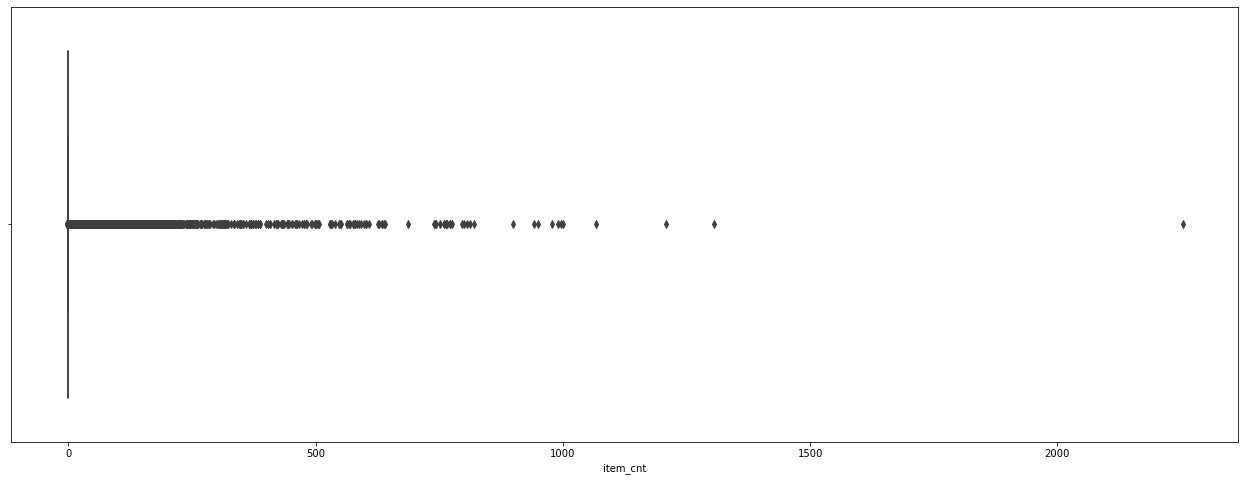

In [21]:
plt.subplots(figsize=(22,8))
sns.boxplot(train_monthly['item_cnt'])
plt.show()

In [22]:
#sales['month'] = sales['month'].astype(str)
def year_month(x):
  a=str(x.year)
  b=str(x.month)
  c=a+'-'+b
  return c
sales['year_month']=sales['date'].apply(year_month)



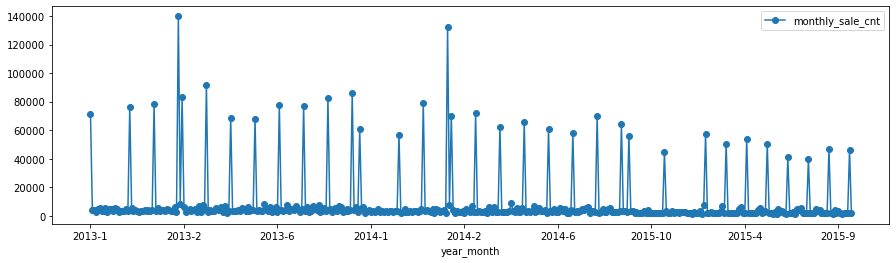

In [23]:
shop_item_pair_num_month = sales
shop_item_pair_num_month = sales.groupby(['year_month','date_block_num'])['item_cnt_day'].sum()
shop_item_pair_num_month.name = 'monthly_sale_cnt'
shop_item_pair_num_month = shop_item_pair_num_month.reset_index()
ax = shop_item_pair_num_month.plot(x='year_month',y='monthly_sale_cnt',x_compat=True,figsize=(15,4),marker='o')

# plt.xticks(shop_item_pair_num_month.date_block_num, shop_item_pair_num_month.year_month, rotation='vertical')

# plt.xlabel('Year-Month',fontsize=16)
# plt.ylabel('Monthly Sale Count (ea)',fontsize=16)
# plt.title('Monthly Sale Count Trend',fontsize=20)

Text(0.5, 1.0, 'Shops Monthly Sale')

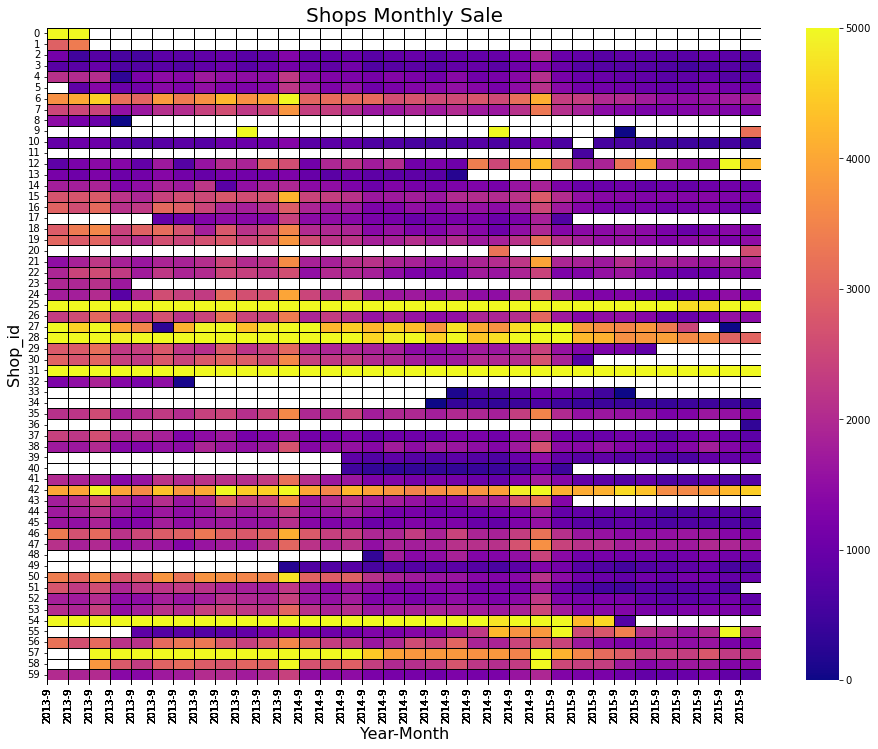

In [24]:
# shop_item_pair_num_month = sales
# shop_item_pair_num_month = sales.groupby(['year_month','date_block_num'])['item_cnt_day'].sum()
# shop_item_pair_num_month.name = 'monthly_sale_cnt'
# shop_item_pair_num_month = shop_item_pair_num_month.reset_index()
# ax = shop_item_pair_num_month.plot(x='year_month',y='monthly_sale_cnt',x_compat=True,figsize=(15,4),marker='o')

# plt.xticks(shop_item_pair_num_month.date_block_num, shop_item_pair_num_month.year_month, rotation='vertical')

# plt.xlabel('Year-Month',fontsize=16)
# plt.ylabel('Monthly Sale Count (ea)',fontsize=16)
# plt.title('Monthly Sale Count Trend',fontsize=20)
#sales
all_shops = np.sort(sales['shop_id'].unique())
all_items = np.sort(sales['item_id'].unique())
all_pairs = pd.DataFrame(index=all_shops,columns=all_items)
all_pairs = all_pairs.fillna(-1).stack()
all_pairs.index.names = ['shop_id','item_id']
all_pairs = all_pairs.reset_index()
all_pairs = all_pairs.drop(0,axis=1)

all_existed_pair_month = sales.pivot_table(values='item_cnt_day', columns='date_block_num', index=['shop_id','item_id'],aggfunc='sum')

all_pairs = pd.merge(all_pairs,all_existed_pair_month,on=['shop_id','item_id'],how='left')

plt.figure(figsize=(16,12))

sns.heatmap(all_pairs.groupby('shop_id').sum().drop('item_id',axis=1).replace(0,np.nan),vmax=5000,cmap='plasma',linewidths=1,linecolor='black')
plt.xticks(shop_item_pair_num_month.date_block_num, shop_item_pair_num_month.year_month, rotation='vertical')

plt.xlabel('Year-Month',fontsize=16)
plt.ylabel('Shop_id',fontsize=16)
plt.title('Shops Monthly Sale',fontsize=20)

In [25]:
#Defining date as datetime
sales['date'] = pd.to_datetime(sales['date'], format = '%d.%m.%Y')

#Now for a month and year feature. (I find it useful for this kind of data to be grouped by for store, month and year for EDA)
sales['month'] = sales['date'].dt.month
sales['year'] = sales['date'].dt.year
#Feature for day of the week
sales['day_of_week'] = sales['date'].dt.day_of_week

#Making a revenue feature
sales['revenue'] = sales.item_price.values * sales.item_cnt_day.values
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year_month,month,year,day_of_week,revenue
0,2013-02-01,0,59,22154,999.000000,1,2013-2,2,2013,4,999.000000
1,2013-03-01,0,25,2552,899.000000,1,2013-3,3,2013,4,899.000000
2,2013-05-01,0,25,2552,899.000000,-1,2013-5,5,2013,2,-899.000000
3,2013-06-01,0,25,2554,1709.050049,1,2013-6,6,2013,5,1709.050049
4,2013-01-15,0,25,2555,1099.000000,1,2013-1,1,2013,1,1099.000000


In [26]:
sales_agg = sales.groupby(['year', 'month', 'shop_id'])['revenue'].sum().reset_index()
sales_agg['shop_id'].value_counts()

35    36
47    36
30    36
31    36
37    36
38    36
41    36
42    36
44    36
45    36
46    36
50    36
27    36
51    36
52    36
53    36
54    36
55    36
56    36
57    36
58    36
59    36
28    36
29    36
26    36
16    36
2     36
3     36
4     36
5     36
6     36
7     36
10    36
12    36
14    36
25    36
15    36
17    36
18    36
19    36
21    36
22    36
24    36
43    35
49    25
13    24
39    24
40    24
48    24
34    24
33    24
9     13
11    12
0     12
1     12
32    12
23    12
8     12
20     9
36     1
Name: shop_id, dtype: int64

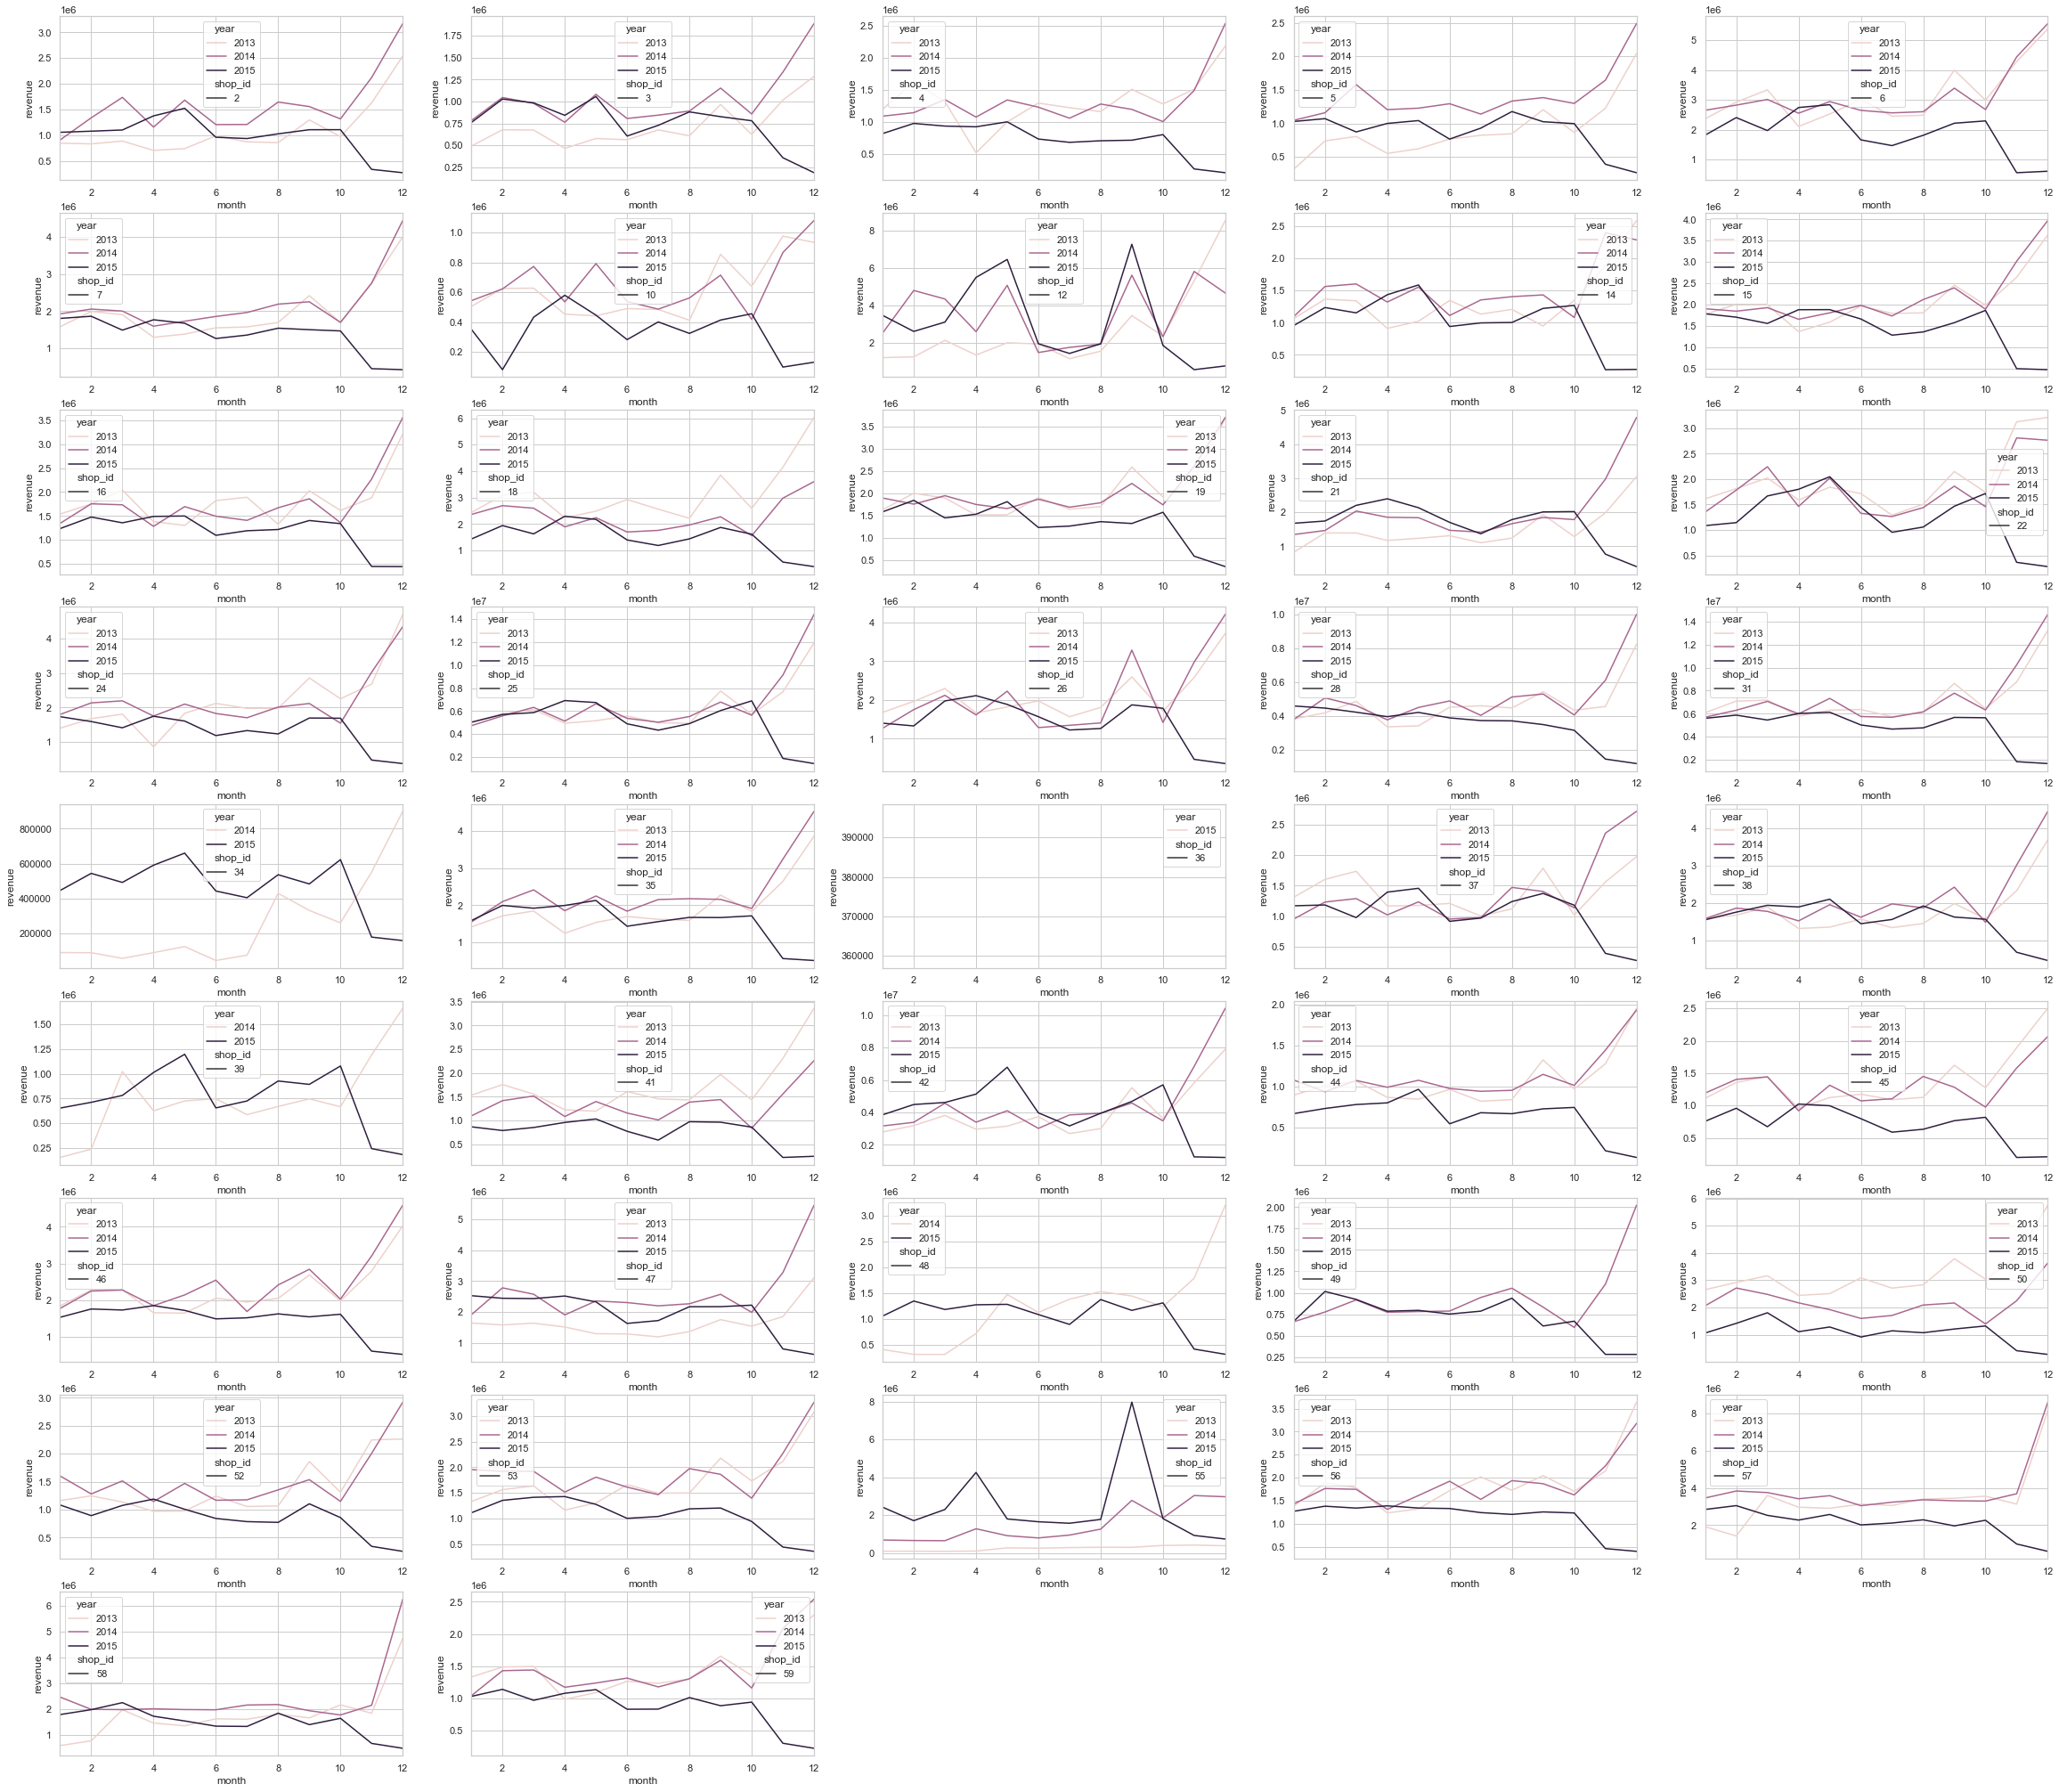

In [27]:
sns.set_theme(style="whitegrid")

fig = plt.figure(figsize=(40, 40))

for i, j in enumerate(test.sort_values('shop_id').shop_id.unique()):
    temp = sales_agg[sales_agg['shop_id'] == j]
    fig = plt.subplot(10, 5, i+1)
    sns.lineplot(
        x = 'month',
        y = 'revenue',
        style = "shop_id",
        hue = 'year',
        ci = None,
        data = temp).set_xlim(1,12)

In [28]:
x=items.groupby(['item_category_id']).count()
x=x.sort_values(by='item_id',ascending=False)
x=x.iloc[0:10].reset_index()
x

,item_category_id,item_name,item_id
0,40,5035,5035
1,55,2365,2365
2,37,1780,1780
3,31,1125,1125
4,58,790,790
5,30,756,756
6,72,666,666
7,19,628,628
8,61,598,598
9,23,501,501


E:\acaconda\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


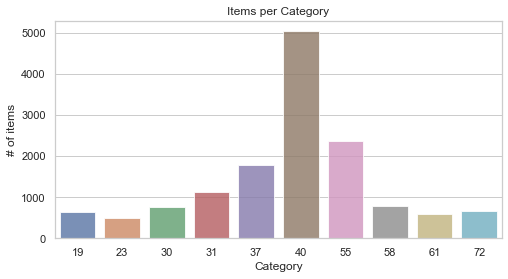

In [29]:
# plot

plt.figure(figsize=(8,4))
ax= sns.barplot(x.item_category_id, x.item_id, alpha=0.8)
plt.title("Items per Category")
plt.ylabel('# of items', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()
# 这里前面X赋值前10，因为10个数据值比较适合条形图可视化，而原84个值则数量太多，不宜画图。
# seaborn的条形图barplot,明显比matplotlib的条形图,好看很多。
# 还有个发现：seaborn的这个barplot，绘制的时候按照item_category_id升序排列了，估计是默认的。
# 回到分析正题：销量最高的是40号商品，达到了接近5000的量，其次是55号商品约2500销量和37号1900销量。销量第一名40号是遥遥领先。

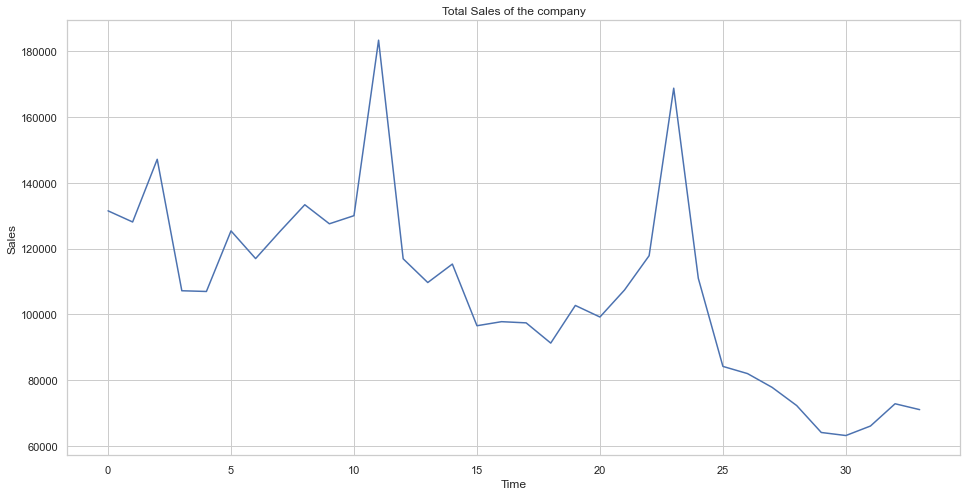

In [30]:
# 这里预测下个月所有商品在所有商店的销售总额。

ts=sales.groupby(["date_block_num"])["item_cnt_day"].sum()  # 按月周期，求总和销售额
ts.astype('float') # 转换字符格式成浮点数，方便计算。
plt.figure(figsize=(16,8))  # 画个图
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts);  #如果此语句替换成 plt.show()，则图形结果是一张有坐标轴和标题的白板，没有任何折线或其他内容。
# 另外，刚刚发现，上边最后一个分号“;”，原来作用类似等同于plt.show().——可减一行代码，不愧是简洁优美。

# 回到分析上来，随着时间推移，销售总额的两个峰值，大约在第12个月和第24个月，刚好是年周期。
#于是大胆猜测峰值出现的周期为12个月


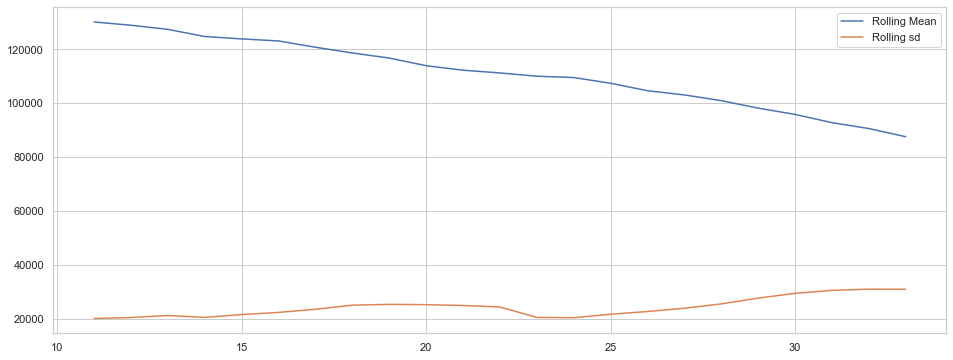

In [31]:
# 以12个月为周期，看看滚动变化。

# python时间序列分析之_用pandas中的rolling函数计算时间窗口数据——更详细用法可通过搜索引擎深入研究。

plt.figure(figsize=(16,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();   # legend()函数表示显示标签，如果没有，则'Rolling Mean'和'Rolling sd'标签不显示。

# 明显看到，滚动月均销售总额在逐月下降，是经济形势逐月下降，还是公司战略和市场认可度发生了负面的变化呢？
# 作为数据分析师，发现这么要命的趋势变化，得进一步深挖原因，最好还能找到应对措施。

# 至于滚动月均标准差，隐隐约约展现了12个月一个周期，而且周期内缓慢上升；而周期外整体是下降趋势。
# 说明年初销售额下降幅度不大，到了年中甚至年尾，一年下来各月销售额下降越来越快，直到次年年初才又稳住下降趋势。

# 此处斗胆推测：
# （1）如果企业经营和选品没问题，那就是整体市场需求发生了变化，而且逐年下降。另外，此类商品在年初需求又比较大，在年中年尾需求较小。
# （2）如果整体市场需求稳定没有下降趋势，那就证明是企业经营或者是选品或者是营销宣传出了问题，需要深入排查解决。


In [32]:
# to remove trend
from pandas import Series as Series
# create a differenced series 差分序列
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob


# 普及帖: 为什么差分时间序列数据?

# 差分是一种变换时间序列数据集的方法。
# 它可以用于消除序列对时间性的依赖性，即所谓的时间性依赖。这包含趋势和周期性的结构。
# 不同的方法可以帮助稳定时间序列的均值，消除时间序列的变化，从而消除(或减少)趋势和周期性。

# 通过从当前观察中减去先前观察值来实现差分。
# difference(t) = observation(t) - observation(t-1)
# 这样可以计算出序列差分。

# 延迟差分
# 将连续观察值之间的差值称为延迟-1差分。
# 可以调整延迟差分来适应特定的时间结构。
# 对于有周期性成分的时间序列，延迟可能是周期性的周期(宽度)。

# 差分序列
# 执行差分操作后，如非线性趋势的情况下，时间结构可能仍然存在。
# 因此，差分过程可以一直重复，直到所有时间依赖性被消除。
# 执行差分的次数称为差分序列。
# 上面那一步,是原贴中自定义差分函数def difference。

# diff（）函数
# 经搜索得知,pandas库有内置差分函数,可直接引用，自动计算差分数据集。这个diff（）函数是由Series和DataFrame对象提供。
# 就像前一节中手动定义的差分函数一样，它需要一个参数来指定间隔或延迟，在本例中称为周期（periods）。
# 优势是，代码行更少更简洁，且可以保留时间序列中时间和日期的信息。


# diff（）函数应用例子：

# from pandas import read_csv
# from pandas import datetime
# from matplotlib import pyplot
 
# def parser(x):
#     return datetime.strptime('190'+x, '%Y-%m')
 
# series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# diff = series.diff()
# pyplot.plot(diff)
# pyplot.show()

# 信息参考来源：http://www.atyun.com/4248.html


[]

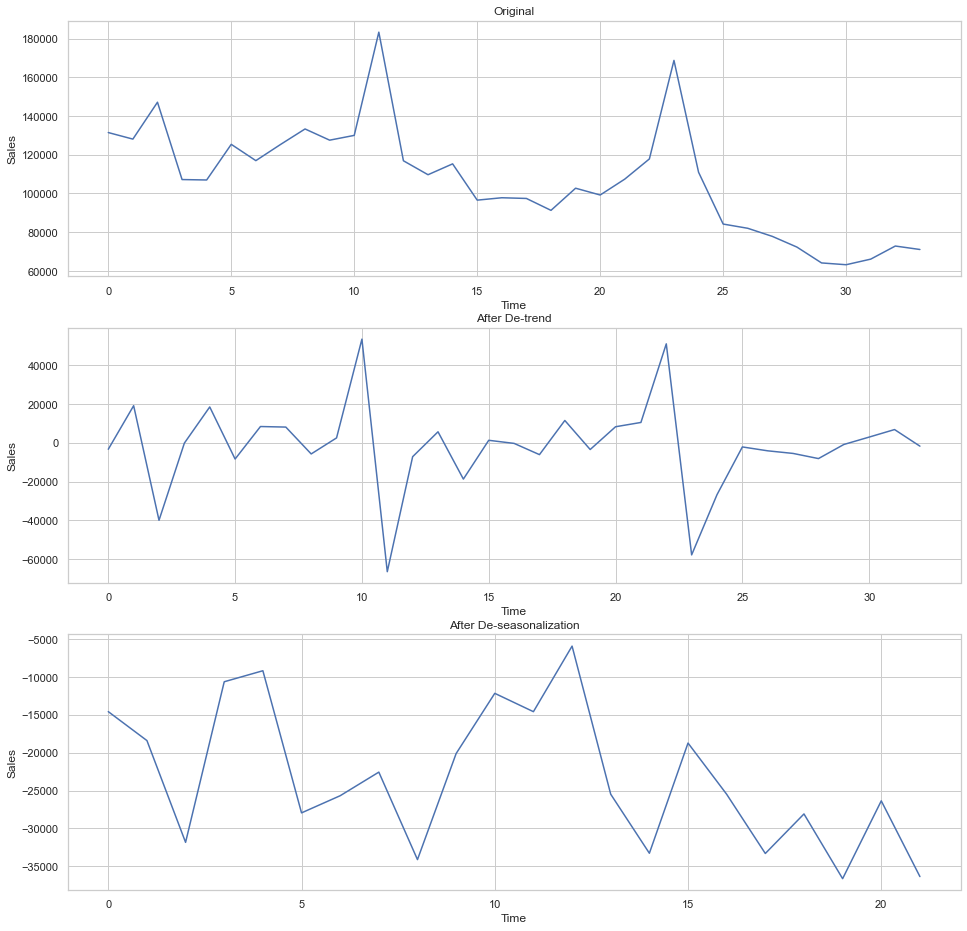

In [33]:
ts=sales.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,16))
plt.subplot(311)
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)  # 这图前面单个画过，这里用于与后面差分对比。

plt.subplot(312)
plt.title('After De-trend')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts)
plt.plot(new_ts)
plt.plot()

plt.subplot(313)
plt.title('After De-seasonalization')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts,12)       # assuming the seasonality is 12 months long
plt.plot(new_ts)
plt.plot()


In [34]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used']) 
    # pd.series的index用于给特定行附上标签
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value  # 继续备注，方便查看
    print (dfoutput)


test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                 -2.395704
p-value                         0.142953
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


In [35]:
# now testing the stationarity again after de-seasonality
test_stationarity(new_ts)

Results of Dickey-Fuller Test:
Test Statistic                 -3.270101
p-value                         0.016269
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [36]:
# 平稳性检测通过

In [37]:
sales
#sales_agg = sales.groupby(['year', 'month', 'shop_id'])['revenue'].sum().reset_index()
# sales_agg['shop_id'].value_counts()
# sns.set_theme(style="whitegrid")

# fig = plt.figure(figsize=(50, 50))
#sales_agg
# for i, j in enumerate(test.sort_values('shop_id').shop_id.unique()):
#     temp = sales_agg[sales_agg['shop_id'] == j]
#     fig = plt.subplot(10, 5, i+1)
#     sns.lineplot(
#         x = 'month',
#         y = 'revenue',
#         style = "shop_id",
#         hue = 'year',
#         ci = None,
#         data = temp).set_xlim(1,12)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year_month,month,year,day_of_week,revenue
0,2013-02-01,0,59,22154,999.000000,1,2013-2,2,2013,4,999.000000
1,2013-03-01,0,25,2552,899.000000,1,2013-3,3,2013,4,899.000000
2,2013-05-01,0,25,2552,899.000000,-1,2013-5,5,2013,2,-899.000000
3,2013-06-01,0,25,2554,1709.050049,1,2013-6,6,2013,5,1709.050049
4,2013-01-15,0,25,2555,1099.000000,1,2013-1,1,2013,1,1099.000000
...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.000000,1,2015-10,10,2015,5,299.000000
2935845,2015-09-10,33,25,7460,299.000000,1,2015-9,9,2015,3,299.000000
2935846,2015-10-14,33,25,7459,349.000000,1,2015-10,10,2015,2,349.000000
2935847,2015-10-22,33,25,7440,299.000000,1,2015-10,10,2015,3,299.000000


In [38]:
train_monthly = train_monthly.query('item_cnt >= 0 and item_cnt <= 20 and item_price < 40000')
train_monthly.head().append(train_monthly.tail())

,date_block_num,shop_id,item_id,item_category_id,item_price,mean_item_price,item_cnt,mean_item_cnt,transactions,year,month
0,0,2,5572,2.0,10730.000000,1532.857178,9.0,1.285714,7.0,2013,0
1,0,2,5643,2.0,4775.209961,2387.604980,0.0,0.000000,2.0,2013,0
2,0,2,5583,5.0,1188.300049,594.150024,2.0,1.000000,2.0,2013,0
3,0,2,7893,6.0,5970.000000,1990.000000,3.0,1.000000,3.0,2013,0
4,0,2,7894,6.0,1490.000000,1490.000000,1.0,1.000000,1.0,2013,0
6734443,33,36,9103,0.0,0.000000,0.000000,0.0,0.000000,0.0,2015,9
6734444,33,36,9107,0.0,0.000000,0.000000,0.0,0.000000,0.0,2015,9
6734445,33,36,5704,0.0,0.000000,0.000000,0.0,0.000000,0.0,2015,9
6734446,33,36,12733,0.0,0.000000,0.000000,0.0,0.000000,0.0,2015,9
6734447,33,36,15925,0.0,0.000000,0.000000,0.0,0.000000,0.0,2015,9


In [39]:
train_monthly['item_cnt_month'] = train_monthly.sort_values('date_block_num').groupby(['shop_id', 'item_id'])['item_cnt'].shift(-1)   #下个月的销量

In [40]:
train_monthly['item_price_unit'] = train_monthly['item_price'] // train_monthly['item_cnt']
train_monthly['item_price_unit'].fillna(0, inplace=True)

In [41]:
gp_item_price = train_monthly.sort_values('date_block_num').groupby(['item_id'], as_index=False).agg({'item_price':[np.min, np.max]})
gp_item_price.columns = ['item_id', 'hist_min_item_price', 'hist_max_item_price']

train_monthly = pd.merge(train_monthly, gp_item_price, on='item_id', how='left')

train_monthly['price_increase'] = train_monthly['item_price'] - train_monthly['hist_min_item_price']
train_monthly['price_decrease'] = train_monthly['hist_max_item_price'] - train_monthly['item_price']

In [42]:
train_monthly

,date_block_num,shop_id,item_id,item_category_id,item_price,mean_item_price,item_cnt,mean_item_cnt,transactions,year,month,item_cnt_month,item_price_unit,hist_min_item_price,hist_max_item_price,price_increase,price_decrease
0,0,2,5572,2.0,10730.000000,1532.857178,9.0,1.285714,7.0,2013,0,1.0,1192.0,0.0,18979.5,10730.000000,8249.500000
1,0,2,5643,2.0,4775.209961,2387.604980,0.0,0.000000,2.0,2013,0,0.0,inf,0.0,35260.0,4775.209961,30484.789062
2,0,2,5583,5.0,1188.300049,594.150024,2.0,1.000000,2.0,2013,0,1.0,594.0,0.0,5592.0,1188.300049,4403.700195
3,0,2,7893,6.0,5970.000000,1990.000000,3.0,1.000000,3.0,2013,0,2.0,1990.0,0.0,27950.0,5970.000000,21980.000000
4,0,2,7894,6.0,1490.000000,1490.000000,1.0,1.000000,1.0,2013,0,2.0,1490.0,0.0,25880.0,1490.000000,24390.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727038,33,36,9103,0.0,0.000000,0.000000,0.0,0.000000,0.0,2015,9,NaN,0.0,0.0,500.0,0.000000,500.000000
6727039,33,36,9107,0.0,0.000000,0.000000,0.0,0.000000,0.0,2015,9,NaN,0.0,0.0,300.0,0.000000,300.000000
6727040,33,36,5704,0.0,0.000000,0.000000,0.0,0.000000,0.0,2015,9,NaN,0.0,0.0,1750.0,0.000000,1750.000000
6727041,33,36,12733,0.0,0.000000,0.000000,0.0,0.000000,0.0,2015,9,NaN,0.0,0.0,2980.0,0.000000,2980.000000


In [43]:
# Min value
f_min = lambda x: x.rolling(window=3, min_periods=1).min()
# Max value
f_max = lambda x: x.rolling(window=3, min_periods=1).max()
# Mean value
f_mean = lambda x: x.rolling(window=3, min_periods=1).mean()
# Standard deviation
f_std = lambda x: x.rolling(window=3, min_periods=1).std()

function_list = [f_min, f_max, f_mean, f_std]
function_name = ['min', 'max', 'mean', 'std']

for i in range(len(function_list)):
    train_monthly[('item_cnt_%s' % function_name[i])] = train_monthly.sort_values('date_block_num').groupby(['shop_id', 'item_category_id', 'item_id'])['item_cnt'].apply(function_list[i])

# Fill the empty std features with 0
train_monthly['item_cnt_std'].fillna(0, inplace=True)

In [44]:
lag_list = [1, 2, 3]

for lag in lag_list:
    ft_name = ('item_cnt_shifted%s' % lag)
    train_monthly[ft_name] = train_monthly.sort_values('date_block_num').groupby(['shop_id', 'item_category_id', 'item_id'])['item_cnt'].shift(lag)
    # Fill the empty shifted features with 0
    train_monthly[ft_name].fillna(0, inplace=True)

In [45]:
train_monthly['item_trend'] = train_monthly['item_cnt']

for lag in lag_list:
    ft_name = ('item_cnt_shifted%s' % lag)
    train_monthly['item_trend'] -= train_monthly[ft_name]

train_monthly['item_trend'] /= len(lag_list) + 1

In [46]:
train_set = train_monthly.query('date_block_num >= 3 and date_block_num < 28').copy()
validation_set = train_monthly.query('date_block_num >= 28 and date_block_num < 33').copy()
test_set = train_monthly.query('date_block_num == 33').copy()

train_set.dropna(subset=['item_cnt_month'], inplace=True)
validation_set.dropna(subset=['item_cnt_month'], inplace=True)

train_set.dropna(inplace=True)
validation_set.dropna(inplace=True)

In [47]:
# Shop mean encoding.
gp_shop_mean = train_set.groupby(['shop_id']).agg({'item_cnt_month': ['mean']})
gp_shop_mean.columns = ['shop_mean']
gp_shop_mean.reset_index(inplace=True)
# Item mean encoding.
gp_item_mean = train_set.groupby(['item_id']).agg({'item_cnt_month': ['mean']})
gp_item_mean.columns = ['item_mean']
gp_item_mean.reset_index(inplace=True)
# Shop with item mean encoding.
gp_shop_item_mean = train_set.groupby(['shop_id', 'item_id']).agg({'item_cnt_month': ['mean']})
gp_shop_item_mean.columns = ['shop_item_mean']
gp_shop_item_mean.reset_index(inplace=True)
# Year mean encoding.
gp_year_mean = train_set.groupby(['year']).agg({'item_cnt_month': ['mean']})
gp_year_mean.columns = ['year_mean']
gp_year_mean.reset_index(inplace=True)
# Month mean encoding.
gp_month_mean = train_set.groupby(['month']).agg({'item_cnt_month': ['mean']})
gp_month_mean.columns = ['month_mean']
gp_month_mean.reset_index(inplace=True)


# Add meand encoding features to train set.
train_set = pd.merge(train_set, gp_shop_mean, on=['shop_id'], how='left')
train_set = pd.merge(train_set, gp_item_mean, on=['item_id'], how='left')
train_set = pd.merge(train_set, gp_shop_item_mean, on=['shop_id', 'item_id'], how='left')
train_set = pd.merge(train_set, gp_year_mean, on=['year'], how='left')
train_set = pd.merge(train_set, gp_month_mean, on=['month'], how='left')
# Add meand encoding features to validation set.
validation_set = pd.merge(validation_set, gp_shop_mean, on=['shop_id'], how='left')
validation_set = pd.merge(validation_set, gp_item_mean, on=['item_id'], how='left')
validation_set = pd.merge(validation_set, gp_shop_item_mean, on=['shop_id', 'item_id'], how='left')
validation_set = pd.merge(validation_set, gp_year_mean, on=['year'], how='left')
validation_set = pd.merge(validation_set, gp_month_mean, on=['month'], how='left')

In [48]:
# Create train and validation sets and labels. 
X_train = train_set.drop(['item_cnt_month', 'date_block_num'], axis=1)
Y_train = train_set['item_cnt_month'].astype(int)
X_validation = validation_set.drop(['item_cnt_month', 'date_block_num'], axis=1)
Y_validation = validation_set['item_cnt_month'].astype(int)

In [49]:
# Integer features (used by catboost model).
int_features = ['shop_id', 'item_id', 'year', 'month']

X_train[int_features] = X_train[int_features].astype('int32')
X_validation[int_features] = X_validation[int_features].astype('int32')

In [50]:
latest_records = pd.concat([train_set, validation_set]).drop_duplicates(subset=['shop_id', 'item_id'], keep='last')
#latest_records为每个shop_id,item_id组合的最新的特征记录，如果每验证集的最后一个月出现了某种组合，则该组合特征记录一定是在最有一个月，
#如果最后一个月没有，则找最近的一个月份的
#特征记录
X_test = pd.merge(test, latest_records, on=['shop_id', 'item_id'], how='left', suffixes=['', '_'])  #让每个组合拥有最近的记录
X_test.head().append(X_test.tail())
X_test['year'] = 2015
X_test['month'] = 9
X_test.drop('item_cnt_month', axis=1, inplace=True)
X_test[int_features] = X_test[int_features].astype('int32')
X_test = X_test[X_train.columns]

In [51]:
sets = [X_train, X_validation, X_test]


for dataset in sets:
    for shop_id in dataset['shop_id'].unique():
        for column in dataset.columns:
            shop_median = dataset[(dataset['shop_id'] == shop_id)][column].median()
            dataset.loc[(dataset[column].isnull()) & (dataset['shop_id'] == shop_id), column] = shop_median

# 将缺失值置为均值
X_test.fillna(X_test.mean(), inplace=True)

In [52]:
X_train.drop(['item_category_id'], axis=1, inplace=True)
X_validation.drop(['item_category_id'], axis=1, inplace=True)
X_test.drop(['item_category_id'], axis=1, inplace=True)

In [53]:
X_test

,shop_id,item_id,item_price,mean_item_price,item_cnt,mean_item_cnt,transactions,year,month,item_price_unit,...,item_cnt_std,item_cnt_shifted1,item_cnt_shifted2,item_cnt_shifted3,item_trend,shop_mean,item_mean,shop_item_mean,year_mean,month_mean
0,5,5037,749.5,749.5,1.0,1.0,1.0,2015,9,749.0,...,1.154701,3.0,1.0,1.0,-1.00,0.133682,0.703527,0.28,0.223614,0.166349
1,5,5320,0.0,0.0,0.0,0.0,0.0,2015,9,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.133682,0.053333,0.00,0.223614,0.166349
2,5,5233,2997.0,999.0,3.0,1.0,3.0,2015,9,999.0,...,1.000000,1.0,2.0,3.0,-0.75,0.133682,0.071429,0.12,0.223614,0.166349
3,5,5232,0.0,0.0,0.0,0.0,0.0,2015,9,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.133682,0.000000,0.00,0.223614,0.166349
4,5,5268,0.0,0.0,0.0,0.0,0.0,2015,9,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.133682,0.053333,0.00,0.223614,0.166349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,45,18454,0.0,0.0,0.0,0.0,0.0,2015,9,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.119960,0.403810,0.32,0.223614,0.166349
214196,45,16188,0.0,0.0,0.0,0.0,0.0,2015,9,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.119960,0.000000,0.00,0.223614,0.166349
214197,45,15757,0.0,0.0,0.0,0.0,0.0,2015,9,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.119960,0.230476,0.24,0.223614,0.166349
214198,45,19648,0.0,0.0,0.0,0.0,0.0,2015,9,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.119960,0.030476,0.00,0.223614,0.166349


In [54]:
train_set

,date_block_num,shop_id,item_id,item_category_id,item_price,mean_item_price,item_cnt,mean_item_cnt,transactions,year,...,item_cnt_std,item_cnt_shifted1,item_cnt_shifted2,item_cnt_shifted3,item_trend,shop_mean,item_mean,shop_item_mean,year_mean,month_mean
0,3,2,5572,2.0,2980.0,1490.0,2.0,1.0,2.0,2013,...,0.577350,1.0,1.0,9.0,-2.25,0.097199,1.004766,0.84,0.134735,0.156194
1,3,2,5643,0.0,0.0,0.0,0.0,0.0,0.0,2013,...,0.000000,0.0,0.0,0.0,0.00,0.097199,1.818702,1.84,0.134735,0.156194
2,3,2,5583,0.0,0.0,0.0,0.0,0.0,0.0,2013,...,0.000000,0.0,0.0,0.0,0.00,0.097199,0.589524,0.04,0.134735,0.156194
3,3,2,7893,6.0,9350.0,1870.0,5.0,1.0,5.0,2013,...,2.081666,1.0,2.0,3.0,-0.25,0.097199,3.038388,3.12,0.134735,0.156194
4,3,2,7894,0.0,0.0,0.0,0.0,0.0,0.0,2013,...,0.000000,0.0,0.0,0.0,0.00,0.097199,3.670837,1.68,0.134735,0.156194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946007,27,36,9103,0.0,0.0,0.0,0.0,0.0,0.0,2015,...,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.00,0.223614,0.156194
4946008,27,36,9107,0.0,0.0,0.0,0.0,0.0,0.0,2015,...,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.00,0.223614,0.156194
4946009,27,36,5704,0.0,0.0,0.0,0.0,0.0,0.0,2015,...,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.00,0.223614,0.156194
4946010,27,36,12733,0.0,0.0,0.0,0.0,0.0,0.0,2015,...,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.00,0.223614,0.156194


In [55]:
from xgboost import XGBRegressor

# Use only part of features on XGBoost.
xgb_features = ['item_cnt','item_cnt_mean', 'item_cnt_std', 'item_cnt_shifted1', 
                'item_cnt_shifted2', 'item_cnt_shifted3', 'shop_mean', 
                'shop_item_mean', 'item_trend', 'mean_item_cnt']
xgb_train = X_train[xgb_features]
xgb_val = X_validation[xgb_features]
xgb_test = X_test[xgb_features]

xgb_model = XGBRegressor(max_depth=8, 
                         n_estimators=500, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7, 
                         subsample=0.7, 
                         eta=0.3, 
                         seed=0)
xgb_model.fit(xgb_train, 
              Y_train, 
              eval_metric="rmse", 
              eval_set=[(xgb_train, Y_train), (xgb_val, Y_validation)], 
              verbose=20, 
              early_stopping_rounds=20)

[0]	validation_0-rmse:0.85462	validation_1-rmse:0.85471
[20]	validation_0-rmse:0.67209	validation_1-rmse:0.79856
[26]	validation_0-rmse:0.67179	validation_1-rmse:0.80102


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             eta=0.3, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=8, min_child_weight=1000, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=0.7,
             tree_method='approx', validate_parameters=1, verbosity=None)

In [56]:
xgb_train_pred = xgb_model.predict(xgb_train)
xgb_val_pred = xgb_model.predict(xgb_val)
xgb_test_pred = xgb_model.predict(xgb_test)

In [57]:
from sklearn.metrics import mean_squared_error
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, xgb_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_validation, xgb_val_pred)))

Train rmse: 0.6910805139415109
Validation rmse: 0.7629980638266309


In [58]:
from sklearn.ensemble import RandomForestRegressor
# Use only part of features on random forest.
rf_features = ['shop_id', 'item_id', 'item_cnt', 'transactions', 'year',
               'item_cnt_mean', 'item_cnt_std', 'item_cnt_shifted1', 
               'shop_mean', 'item_mean', 'item_trend', 'mean_item_cnt']
rf_train = X_train[rf_features]
rf_val = X_validation[rf_features]
rf_test = X_test[rf_features]

rf_model = RandomForestRegressor(n_estimators=50, max_depth=7, random_state=0, n_jobs=-1)
rf_model.fit(rf_train, Y_train)

RandomForestRegressor(max_depth=7, n_estimators=50, n_jobs=-1, random_state=0)

In [59]:
from sklearn.metrics import mean_squared_error
rf_train_pred = rf_model.predict(rf_train)
rf_val_pred = rf_model.predict(rf_val)
rf_test_pred = rf_model.predict(rf_test)

print('Train rmse:', np.sqrt(mean_squared_error(Y_train, rf_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_validation, rf_val_pred)))

Train rmse: 0.6929799517175759
Validation rmse: 0.7693705917526568


In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
knn_features = ['item_cnt', 'item_cnt_mean', 'item_cnt_std', 'item_cnt_shifted1',
                'item_cnt_shifted2', 'shop_mean', 'shop_item_mean', 
                'item_trend', 'mean_item_cnt']

# Subsample train set (using the whole data was taking too long).
X_train_sampled = X_train[:100000]
Y_train_sampled = Y_train[:100000]

knn_train = X_train_sampled[knn_features]
knn_val = X_validation[knn_features]
knn_test = X_test[knn_features]
knn_scaler = preprocessing.MinMaxScaler()
knn_scaler.fit(knn_train)
knn_train = knn_scaler.transform(knn_train)
knn_val = knn_scaler.transform(knn_val)
knn_test = knn_scaler.transform(knn_test)

knn_model = KNeighborsRegressor(n_neighbors=9, leaf_size=13, n_jobs=-1)
knn_model.fit(knn_train, Y_train_sampled)

KNeighborsRegressor(leaf_size=13, n_jobs=-1, n_neighbors=9)

In [61]:
knn_train_pred = knn_model.predict(knn_train)
knn_val_pred = knn_model.predict(knn_val)
knn_test_pred = knn_model.predict(knn_test)

In [62]:
print('Train rmse:', np.sqrt(mean_squared_error(Y_train_sampled, knn_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_validation, knn_val_pred)))

Train rmse: 0.505864252517717
Validation rmse: 0.7950356742041181


In [63]:
from sklearn import linear_model
lr_features = ['item_cnt', 'item_cnt_shifted1', 'item_trend', 'mean_item_cnt', 'shop_mean']
lr_train = X_train[lr_features]
lr_val = X_validation[lr_features]
lr_test = X_test[lr_features]

lr_scaler = preprocessing.MinMaxScaler()
lr_scaler.fit(lr_train)
lr_train = lr_scaler.transform(lr_train)
lr_val = lr_scaler.transform(lr_val)
lr_test = lr_scaler.transform(lr_test)

lr_model = linear_model.LinearRegression(n_jobs=-1)
lr_model.fit(lr_train, Y_train)

LinearRegression(n_jobs=-1)

In [64]:
lr_train_pred = lr_model.predict(lr_train)
lr_val_pred = lr_model.predict(lr_val)
lr_test_pred = lr_model.predict(lr_test)

In [65]:
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lr_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_validation, lr_val_pred)))

Train rmse: 0.7285133881700834
Validation rmse: 0.7683426839357755


In [66]:
X_train

,shop_id,item_id,item_price,mean_item_price,item_cnt,mean_item_cnt,transactions,year,month,item_price_unit,...,item_cnt_std,item_cnt_shifted1,item_cnt_shifted2,item_cnt_shifted3,item_trend,shop_mean,item_mean,shop_item_mean,year_mean,month_mean
0,2,5572.0,2980.0,1490.0,2.0,1.0,2.0,2013,3,1490.0,...,0.577350,1.0,1.0,9.0,-2.25,0.097199,1.004766,0.84,0.134735,0.156194
1,2,5643.0,0.0,0.0,0.0,0.0,0.0,2013,3,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.097199,1.818702,1.84,0.134735,0.156194
2,2,5583.0,0.0,0.0,0.0,0.0,0.0,2013,3,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.097199,0.589524,0.04,0.134735,0.156194
3,2,7893.0,9350.0,1870.0,5.0,1.0,5.0,2013,3,1870.0,...,2.081666,1.0,2.0,3.0,-0.25,0.097199,3.038388,3.12,0.134735,0.156194
4,2,7894.0,0.0,0.0,0.0,0.0,0.0,2013,3,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.097199,3.670837,1.68,0.134735,0.156194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946007,36,9103.0,0.0,0.0,0.0,0.0,0.0,2015,3,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.00,0.223614,0.156194
4946008,36,9107.0,0.0,0.0,0.0,0.0,0.0,2015,3,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.00,0.223614,0.156194
4946009,36,5704.0,0.0,0.0,0.0,0.0,0.0,2015,3,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.00,0.223614,0.156194
4946010,36,12733.0,0.0,0.0,0.0,0.0,0.0,2015,3,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.00,0.223614,0.156194


In [67]:
X_validation

,shop_id,item_id,item_price,mean_item_price,item_cnt,mean_item_cnt,transactions,year,month,item_price_unit,...,item_cnt_std,item_cnt_shifted1,item_cnt_shifted2,item_cnt_shifted3,item_trend,shop_mean,item_mean,shop_item_mean,year_mean,month_mean
0,2,5572.0,1590.0,1590.00,1.0,1.0,1.0,2015,4,1590.0,...,6.580175e-08,1.0,1.0,1.0,-0.5,0.097199,1.004766,0.84,0.223614,0.139961
1,2,5643.0,0.0,0.00,0.0,0.0,0.0,2015,4,0.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.097199,1.818702,1.84,0.223614,0.139961
2,2,5583.0,0.0,0.00,0.0,0.0,0.0,2015,4,0.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.097199,0.589524,0.04,0.223614,0.139961
3,2,7893.0,0.0,0.00,0.0,0.0,0.0,2015,4,0.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.097199,3.038388,3.12,0.223614,0.139961
4,2,7894.0,4579.5,2289.75,2.0,1.0,2.0,2015,4,2289.0,...,2.081666e+00,1.0,5.0,2.0,-1.5,0.097199,3.670837,1.68,0.223614,0.139961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989117,36,9103.0,0.0,0.00,0.0,0.0,0.0,2015,8,0.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.223614,0.166349
989118,36,9107.0,0.0,0.00,0.0,0.0,0.0,2015,8,0.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.223614,0.166349
989119,36,5704.0,0.0,0.00,0.0,0.0,0.0,2015,8,0.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.223614,0.166349
989120,36,12733.0,0.0,0.00,0.0,0.0,0.0,2015,8,0.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.223614,0.166349


In [68]:
Y_validation

0         0
1         0
2         0
3         4
4         1
         ..
989117    0
989118    0
989119    0
989120    0
989121    0
Name: item_cnt_month, Length: 989122, dtype: int32

In [69]:
# from catboost import CatBoostRegressor
# cat_features = ["shop_id", "item_id", "year","month"]

# X_train["shop_id"] = X_train["shop_id"].astype(str) 
# X_train["item_id"] = X_train["item_id"].astype(str) 
# X_train["year"] = X_train["year"].astype(str) 
# X_train["month"] = X_train["month"].astype(str) 
# X_train["month"] = X_train["month"].astype(str) 
# catboost_model = CatBoostRegressor(
#     iterations=500,
#     max_ctr_complexity=4,
#     random_seed=0,
#     od_type='Iter',
#     od_wait=25,
#     verbose=50,
#     depth=4
# )

# catboost_model.fit(
#     X_train, Y_train,
#     cat_features=cat_features,
#     eval_set=(X_validation, Y_validation)
# )

In [70]:
# feature_score = pd.DataFrame(list(zip(X_train.dtypes.index, catboost_model.get_feature_importance(Pool(X_train, label=Y_train, cat_features=cat_features)))), columns=['Feature','Score'])
# feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

# plt.rcParams["figure.figsize"] = (19, 6)
# ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
# ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
# ax.set_xlabel('')
# rects = ax.patches
# labels = feature_score['Score'].round(2)

# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

# plt.show()

In [71]:
first_level = pd.DataFrame(xgb_val_pred, columns=['xgboost'])
first_level['random_forest'] = rf_val_pred
first_level['linear_regression'] = lr_val_pred
first_level['knn'] = knn_val_pred
first_level['label'] = Y_validation.values
first_level.head(10)

,xgboost,random_forest,linear_regression,knn,label
0,0.590998,0.615518,0.595862,1.000000,0
1,0.495485,0.583958,0.044673,0.777778,0
2,0.081033,0.170827,0.044673,0.000000,0
3,0.592935,0.846235,0.044673,0.111111,4
4,1.642329,1.665566,1.451371,0.666667,1
5,0.495485,0.431563,0.044673,0.111111,1
6,0.332336,0.170827,0.044673,0.111111,0
7,0.081033,0.060816,0.044673,0.000000,1
8,0.266137,0.170827,0.044673,0.111111,0
9,1.532142,1.216129,1.148831,2.888889,2


In [72]:
first_level_test = pd.DataFrame(xgb_test_pred, columns=['xgboost'])
first_level_test['random_forest'] = rf_test_pred
first_level_test['linear_regression'] = lr_test_pred
first_level_test['knn'] = knn_test_pred

In [73]:
meta_model = linear_model.LinearRegression(n_jobs=-1)

first_level.drop('label', axis=1, inplace=True)
meta_model.fit(first_level, Y_validation)

ensemble_pred = meta_model.predict(first_level)
final_predictions = meta_model.predict(first_level_test)

prediction_df = pd.DataFrame(test['ID'], columns=['ID'])
prediction_df['item_cnt_month'] = final_predictions.clip(0., 20.)
prediction_df.to_csv('e:/19软工1班_Big-Mouth-yy.csv',encoding='gbk')
prediction_df.head(10)

,ID,item_cnt_month
0,0,0.765584
1,1,0.079393
2,2,1.265644
3,3,0.067449
4,4,0.079393
5,5,0.978339
6,6,1.243794
7,7,0.198969
8,8,2.022105
9,9,0.067449


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

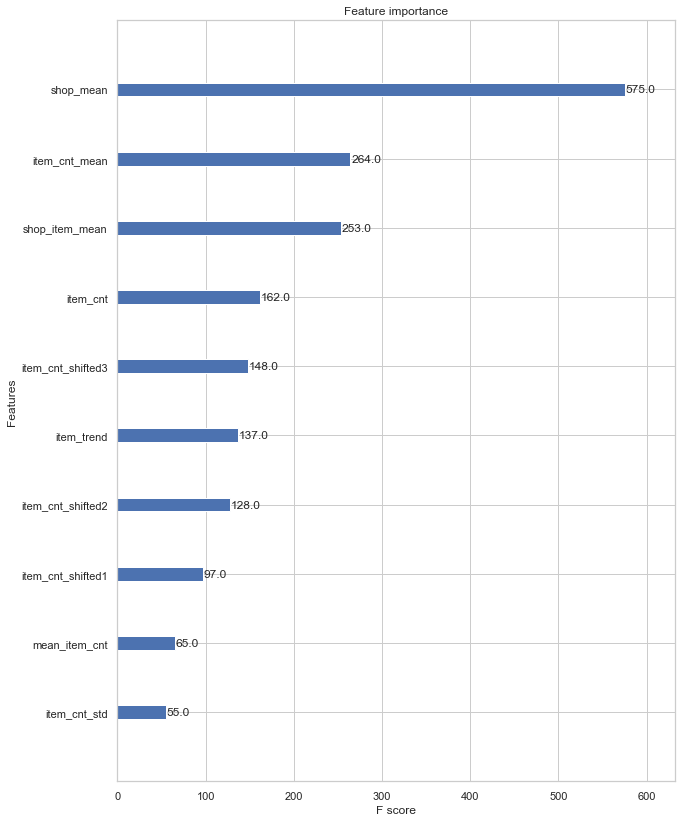

In [77]:
from xgboost import plot_importance
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(xgb_model, (10,14))